In [3]:
import numpy as np   
import pandas as pd        
from scipy import stats as sts 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from math import factorial as fact

## Задачи на проверку гипотез

### Задача №1: Джеймс Бонд

<img src="../images/bond.png" width="300" align='left'>

Ваш друг Джеймс Бонд утверждает, что умеет отличать взболтанный мартини от смешанного. Вы решили проверить это. Чтобы сделать это, вы завязали глаза Бонду и дали попробовать ему мартини 10 раз. Пусть Бонд отгадал тип мартини 6 раз и не угадал 4. Давайте проверим гипотезу о том, что Бонд умеет отличать мартини, используя z-test.

*Выборка:* $1, 0, 0, 1, 1, 0, 0, 1, 1, 1$

**Решение:**

$$
H_0: p = 0.5 \\ 
H_1: p != 0.5 
$$


$$
z = \frac{\hat p - 0.5}{\sqrt{\frac{0.5 (1 - 0.5)}{10}}} \sim_{n \rightarrow \infty} \mathcal{N}(0, 1)
$$

In [9]:
from math import sqrt

In [4]:
X = np.array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1])
n = len(X)
alpha = 0.05

In [27]:
p_hat = np.mean(X)
p_h0 = 0.5

denom = sqrt(p_h0 * (1 - p_h0) / n)

z_obs = (p_hat - p_h0) / denom
z_crit = sts.norm(0, 1).ppf(1 - alpha/2)

print(f'Наблюдаемое значение: {z_obs:.3}', f'Критическое значение: {z_crit:.3}', sep='\n')
if abs(z_obs) > z_crit:
    print('Отвергаем гипотезу')
else:
    print('Не отвергаем гипотезу')

Наблюдаемое значение: 0.632
Критическое значение: 1.96
Не отвергаем гипотезу


In [34]:
sts.norm(0, 1).cdf(-z_obs) * 2

0.5270892568655383

In [28]:
from statsmodels.stats.proportion import proportions_ztest

In [37]:
# h_alt: p != 0.5
proportions_ztest(sum(X), n, value=0.5, alternative='two-sided')

(0.6454972243679027, 0.5186050164287257)

In [30]:
# h_alt: p > 0.5
proportions_ztest(sum(X), n, value=0.5, alternative='larger')  

(0.6454972243679027, 0.25930250821436285)

### Задача №2: О мышах и людях

<img src="../images/vagon.jpeg" width="500" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [38]:
df = pd.read_csv('../data/mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION
#     (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

In [39]:
df

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884
6,1,23,1,1.0,10.143030
7,1,20,1,1.0,7.447534
...,...,...,...,...,...
286,2,20,1,1.0,NaN
287,2,21,1,1.0,NaN
288,2,19,0,0.0,NaN
289,2,21,0,1.0,NaN


### Гипотеза №1: Доля и нажатия на кнопку

Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

In [45]:
sample_real = df[df['STUDY'] == 1]['DECISION'].values
sample_paper = df[df['STUDY'] == 2]['DECISION'].values

In [49]:
print(f'Доля нажатий кнопки на бумаге: {np.mean(sample_paper):.3}')
print(f'Доля нажатий кнопки в реальности: {np.mean(sample_real):.3}')

Доля нажатий кнопки на бумаге: 0.747
Доля нажатий кнопки в реальности: 0.865


In [50]:
proportions_ztest(
    (sum(sample_paper), sum(sample_real)),
    (len(sample_paper), len(sample_real)),
    value=0,
    alternative='smaller',
)

(-2.3780989461645565, 0.008701077805778048)

> __Вывод:__ гипотеза о том, что на кнопку жмут одинаково часто, отвергается. На бумаге на кнопку жмут чаще.

### Гипотеза №2. Среднее и кровожадность

Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

In [64]:
X = df[~df['RT'].isnull()]['RT'].values
n = len(X)

rt_mean = np.mean(X)
print(f'Среднее кол-во секунд раздумья: {rt_mean:.5}')

Среднее кол-во секунд раздумья: 10.117


In [66]:
import matplotlib.pyplot as plt

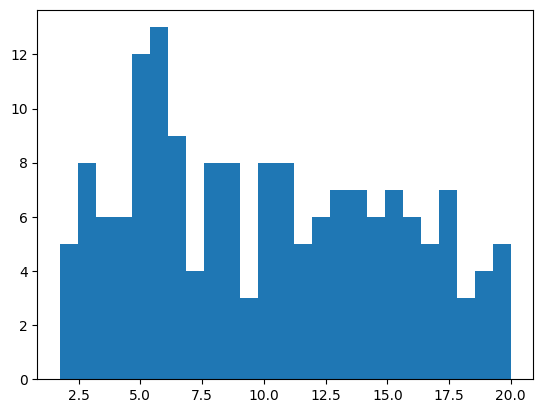

In [72]:
plt.hist(X, bins=25);

In [74]:
alpha = 0.05

In [79]:
z_obs = (rt_mean - 5) / (np.std(X, ddof=1) / sqrt(n))
z_obs

12.97489595097787

In [80]:
z_crit = sts.norm(0, 1).ppf(1 - alpha)

In [81]:
z_crit

1.6448536269514722

In [82]:
sts.ttest_1samp(X, 5, axis=0, alternative='greater')

Ttest_1sampResult(statistic=12.974895950977869, pvalue=2.7586881778173365e-27)